In [ ]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns

In [3]:
playersdatadf = pd.read_csv("player_data.csv")
#print(playersdatadf.head())
# player carrer pos height metrics
playersdf = pd.read_csv("Players.csv")
#print(playersdf.head())
# born / from stuff
stats_df = pd.read_csv("Seasons_stats.csv")

stats_df["ppg"] = stats_df["PTS"] / stats_df["G"]
stats_df["astpg"] = stats_df["AST"] / stats_df["G"]
stats_df["trbpg"] = stats_df["TRB"] / stats_df["G"]
# add columns for stats per game

stats_df['Player'] = stats_df['Player'].str.replace('*', '')
#print(stats_df.loc[stats_df["ppg"].idxmax()])
#print(stats_df.loc[stats_df["astpg"].idxmax()])
#print(stats_df.loc[stats_df["trbpg"].idxmax()])


NameError: name 'pd' is not defined

In [ ]:

highestppg_df = stats_df.loc[stats_df.groupby("Player")['ppg'].idxmax()]
highestppg_df.info()

top10 = highestppg_df.sort_values(by="ppg", ascending=False).head(10)

chart = alt.Chart(top10).mark_bar().encode(
    x=alt.X('Player', title='Player'),
    y=alt.Y('ppg', title='Points Per Game (ppg)'),
    color=alt.Color('WS', scale=alt.Scale(scheme='redblue'), title='WS')
).properties(
    title="Top 10 PPG with Bar Shading Based on Win Shares",
    width=500,
    height=300
)
chart


<class 'pandas.core.frame.DataFrame'>
Index: 3919 entries, 11529 to 16212
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3919 non-null   int64  
 1   Year        3919 non-null   float64
 2   Player      3919 non-null   object 
 3   Pos         3919 non-null   object 
 4   Age         3914 non-null   float64
 5   Tm          3919 non-null   object 
 6   G           3919 non-null   float64
 7   GS          2561 non-null   float64
 8   MP          3713 non-null   float64
 9   PER         3704 non-null   float64
 10  TS%         3906 non-null   float64
 11  3PAr        2673 non-null   float64
 12  FTr         3905 non-null   float64
 13  ORB%        3010 non-null   float64
 14  DRB%        3010 non-null   float64
 15  TRB%        3171 non-null   float64
 16  AST%        3338 non-null   float64
 17  STL%        3010 non-null   float64
 18  BLK%        3010 non-null   float64
 19  TOV%        2792 non-null  

alt.Chart(...)

In [ ]:
highestast_df = stats_df.loc[stats_df.groupby("Player")['astpg'].idxmax()]
highestast_df.info()

top10 = highestast_df.sort_values(by="astpg", ascending = False).head(10)

chart = alt.Chart(top10).mark_bar().encode(
    x=alt.X('Player', title='Player'),
    y=alt.Y('astpg', title='Assists Per Game (astpg)'),
    color=alt.Color('WS', scale=alt.Scale(scheme='redblue'), title='WS')
).properties(
    title="Top 10 astpg with Bar Shading Based on Win Shares",
    width=500,
    height=300
)
chart


<class 'pandas.core.frame.DataFrame'>
Index: 3919 entries, 11529 to 18442
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3919 non-null   int64  
 1   Year        3919 non-null   float64
 2   Player      3919 non-null   object 
 3   Pos         3919 non-null   object 
 4   Age         3914 non-null   float64
 5   Tm          3919 non-null   object 
 6   G           3919 non-null   float64
 7   GS          2569 non-null   float64
 8   MP          3724 non-null   float64
 9   PER         3712 non-null   float64
 10  TS%         3904 non-null   float64
 11  3PAr        2688 non-null   float64
 12  FTr         3902 non-null   float64
 13  ORB%        3021 non-null   float64
 14  DRB%        3021 non-null   float64
 15  TRB%        3187 non-null   float64
 16  AST%        3344 non-null   float64
 17  STL%        3021 non-null   float64
 18  BLK%        3021 non-null   float64
 19  TOV%        2811 non-null  

alt.Chart(...)

In [ ]:
# Creating a wholistic stat to rank players for the year 2017:

recent_stats_df = stats_df[stats_df['Year'] == 2017]

# CREATING A new statistic that combines points per game (ppg), astpg, and trbpg

ppg_weighting = 0.33333
astpg_weighting = 0.33333
trbpg_weighting = 0.33333

recent_stats_df['Hybrid stat'] = (recent_stats_df['ppg'] * ppg_weighting 
                                  + recent_stats_df['astpg'] * astpg_weighting 
                                  + recent_stats_df['trbpg'] * trbpg_weighting)


# Plotting the Hybrid Stat with PPG, ASTPG, and TRBPG to determine if there is a correlation

selection = alt.selection_interval(encodings = ['x'])

plot_one = alt.Chart(recent_stats_df).mark_circle(size = 100).encode(
    x = alt.X('Hybrid stat:Q', title = 'Hybrid Stat combining PPG, Astpg, and TRBpg'),
    y = alt.Y('ppg:Q', title = 'Points Scored per Game'),
    color = 'Tm',
    tooltip = ['Player:N', 'Age:Q', 'ppg:Q', 'Hybrid stat:Q']
    ).add_selection(selection  # Add the selection to the chart 
    ).properties(
    title = 'Relationship between Hybrid Stat and PPG' #Add title to the chart
    )


plot_two = alt.Chart(recent_stats_df).mark_circle(size = 100).encode(
    x = alt.X('Hybrid stat:Q', title = 'Hybrid Stat combining PPG, Astpg, and TRBpg'),
    y = alt.Y('astpg:Q', title = 'Assists earned per Game'),
    color = 'Tm',
    tooltip = ['Player:N', 'Age:Q', 'ppg:Q', 'Hybrid stat:Q']
    ).transform_filter(
    selection  # Filter the data based on the selected income range
    ).properties(
    title = 'Relationship between Income and Population' #Add title to the chart
    )

plot_one | plot_two

/var/folders/qr/qmpmfl5j2075_s0mz_5rn294z2yktj/T/ipykernel_48177/2237908336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_stats_df['Hybrid stat'] = (recent_stats_df['ppg'] * ppg_weighting
/var/folders/qr/qmpmfl5j2075_s0mz_5rn294z2yktj/T/ipykernel_48177/2237908336.py:20: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  plot_one = alt.Chart(recent_stats_df).mark_circle(size = 100).encode(


alt.HConcatChart(...)

float64
           TS%      VORP      OBPM      DBPM       PTS      USG%
TS%   1.000000  0.317366  0.716708  0.130689  0.358733  0.038413
VORP  0.317366  1.000000  0.534984  0.362827  0.739591  0.242124
OBPM  0.716708  0.534984  1.000000  0.150258  0.593111  0.161429
DBPM  0.130689  0.362827  0.150258  1.000000  0.178514 -0.337535
PTS   0.358733  0.739591  0.593111  0.178514  1.000000  0.427502
USG%  0.038413  0.242124  0.161429 -0.337535  0.427502  1.000000


Text(0.5, 1.0, 'Correlation Matrix of NBA Stats')

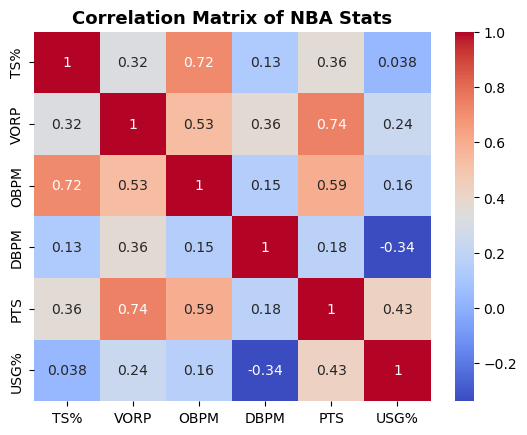

In [ ]:

selected_cols = ['TS%',"VORP","OBPM","DBPM","PTS","USG%","Year"]
mtx_df = stats_df[selected_cols]
print(mtx_df['Year'].dtype)
mtx_df = mtx_df[mtx_df['Year'] > 1975]
mtx_df.dropna(inplace=True)
mtx_df.drop("Year",axis=1,inplace=True)
matrix = mtx_df.corr()
print(matrix)
sns.heatmap(matrix,cmap = "coolwarm", annot=True)
plt.title("Correlation Matrix of NBA Stats", fontsize=13, fontweight="bold")
